# Yvettes Workbook

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import wrangle as wr

In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [91]:
#df = pd.read_pickle('data/data.pickle')
df = wr.get_clean_data(start2018=False)

/Users/yvetteibarra/codeup-data-science/cisco-time-series-analysis/yvette_ibarra/wrangle.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['order_date'] = temp_df['order_date'] +  pd.offsets.DateOffset(years=1)


In [92]:
df

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,month_name,day_name,year,quarter,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,,
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0,720.50,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,2882.00
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,2.0,4328.10,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,8656.20
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0,6017.76,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,24071.04
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0,6085.80,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,6085.80
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0,268.55,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,268.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,Harlingen Waterworks System,Local Government,HARLINGEN,"SHI Government Solutions, Inc.",Austin,78551,2.0,1234.62,232760,2022-11-29,2022-11-25,November,Friday,2022,4,11,47,4,329,2469.24
2022-11-28,City of Duncanville,Local Government,Duncanville,"SHI Government Solutions, Inc.",Austin,75116,6.0,87.63,20221128,2022-11-29,2022-11-28,November,Monday,2022,4,11,48,0,332,525.78
2022-11-28,City of San Antonio,Local Government,San Antonio,Great South Texas Corporation dba Computer Sol...,San Antonio,78283,2.0,215.00,8000437865,2022-11-29,2022-11-28,November,Monday,2022,4,11,48,0,332,430.00


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372837 entries, 2015-05-06 to 2022-11-29
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_name    372837 non-null  object        
 1   customer_type    372837 non-null  object        
 2   customer_city    372837 non-null  object        
 3   reseller_name    370306 non-null  object        
 4   reseller_city    369823 non-null  object        
 5   customer_zip     372837 non-null  object        
 6   order_quantity   372837 non-null  float64       
 7   unit_price       372837 non-null  float64       
 8   po_number        372828 non-null  object        
 9   shipped_date     372837 non-null  datetime64[ns]
 10  order_date_copy  372837 non-null  datetime64[ns]
 11  month_name       372837 non-null  object        
 12  day_name         372837 non-null  object        
 13  year             372837 non-null  int64         
 14  quar

In [94]:
df.isnull().sum()

customer_name         0
customer_type         0
customer_city         0
reseller_name      2531
reseller_city      3014
customer_zip          0
order_quantity        0
unit_price            0
po_number             9
shipped_date          0
order_date_copy       0
month_name            0
day_name              0
year                  0
quarter               0
month                 0
week                  0
day_of_week           0
day_of_year           0
purchase_amount       0
dtype: int64

In [95]:
df.shape

(372837, 20)

In [98]:
#df.order_date.value_counts()

In [100]:
#df[['order_date','shipped_date','purchase_amount','purchase_month']].sort_values(by='order_date')

In [101]:
columns = df.columns.to_list()

In [102]:
for i in columns:
    print(f'--------{i}-------')
    print(df[i].value_counts())
    print('___________________')
    

--------customer_name-------
Texas Health and Human Services Commission      29289
Texas Department of Information Resources       21602
Brownsville Independent School District         12621
City of Austin                                  11930
Harris County                                    8010
                                                ...  
Whitharral Independent School District              1
San Jacinto College District                        1
Hardin-Jefferson Independent School District        1
Coahoma Independent School District                 1
City of Odessa                                      1
Name: customer_name, Length: 1292, dtype: int64
___________________
--------customer_type-------
K-12                122230
Local Government    118033
State Agency         72499
Higher Ed            59454
Other                  621
Name: customer_type, dtype: int64
___________________
--------customer_city-------
Austin            95201
San Antonio       25756
Houston       

**Customer names** include counties seems interesting to maybe seperate by county or school district 
A better way to group would be by **customer type**
```python
--------customer_type-------
K-12                124633
Local Government    120145
State Agency         73068
Higher Ed            60026
Assistance Org         576
Other                   45
Out of State            30
```

Numeric data: **purchase amount**, **order quantity**,  **unit_price**

Question Top sales by customers city use **customer city** or **customer zip**
Question top sales by hub type?

-I would like to use order date as the index

_info to take out 
'sales_fact_number'
'contract_type',
'po_number',
'invoice_number',
'reseller_phone',
'reseller_address',
'vendor_zip',
'vendor_city', 'vendor_state', 'vendor_address', 'vendor_hub_type','vendor_contact',
 'customer_address',
 'rfo_description',
 'rfo_number',

In [103]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['customer_name', 'customer_type', 'customer_city', 'reseller_name',
       'reseller_city', 'customer_zip', 'order_quantity', 'unit_price',
       'po_number', 'shipped_date', 'order_date_copy', 'month_name',
       'day_name', 'year', 'quarter', 'month', 'week', 'day_of_week',
       'day_of_year', 'purchase_amount'],
      dtype='object')>

In [104]:
df_explore = df[['fiscal_year', 'customer_name', 'vendor_name', 'purchase_amount',
       'contract_number',   'customer_type',
       'customer_contact', 'customer_city',
       'customer_state', 'customer_zip',  
       
       'reseller_name', 'reseller_hub_type', 
       'reseller_city', 'reseller_state', 'reseller_zip', 
       'report_received_month', 'purchase_month', 'brand_name',
       'order_quantity', 'unit_price',  
       'order_date', 'shipped_date', 'dir_contract_mgr', 
       'contract_subtype', 'contract_start_date', 'contract_end_date',
       'contract_termination_date'] ]

KeyError: "['fiscal_year', 'vendor_name', 'contract_number', 'customer_contact', 'customer_state', 'reseller_hub_type', 'reseller_state', 'reseller_zip', 'report_received_month', 'purchase_month', 'brand_name', 'order_date', 'dir_contract_mgr', 'contract_subtype', 'contract_start_date', 'contract_end_date', 'contract_termination_date'] not in index"

In [105]:
def datetime_type(df,date):
    ''' datetime_type takes in a dataframe and a ready date columne and reassigns the date to the datetime type
    returns df'''
    # save into dataframe
    df[date] = pd.to_datetime(df[date])
    return df

def distribution( df, var):
    ''' distribution takes in a dataframe and variable and returns a histoplot 
    that  display the distirbution of the variable'''
    # use histplot
    sns.histplot(df[var])
    #show plot
    plt.show();


def set_date_to_index(df, date):
    ''' set_date_to_index takes in a dataframe and string date and set the index of data frame to the index
    returns altered data frame'''
    # Sort rows by the date and then set the index as that date
    df = df.set_index(date).sort_index()
    return df

def add_date_column_string(df,column_name, string='%B'):
    ''' add_date_column takes in a df:data frame and a time frame method run_method: defaulted to %B  month_name()
    and returns a dataframe wiht a new column,'''
    # save into data frame
    df[column_name]=df.index.strftime(string)
    
    return df

def multiply_columns_addto_df(df, column_name, var1, var2):
    ''' multiply_columns_addto_df takes in a dataframe and multiplies two of its variables and sa
    returs'''
    # save into data frame
    df[column_name]= df[var1]* df[var2]
    return df

def fillna(df):
    '''fill na takes in a dataframe and fill in the nans/nulls'''
    # fill in nulls
    df.fillna(0, inplace=True)
    return df

In [107]:
# set order date to date time index
#df_explore = datetime_type(df_explore,'order_date')
#df_explore = set_date_to_index(df_explore, 'order_date')


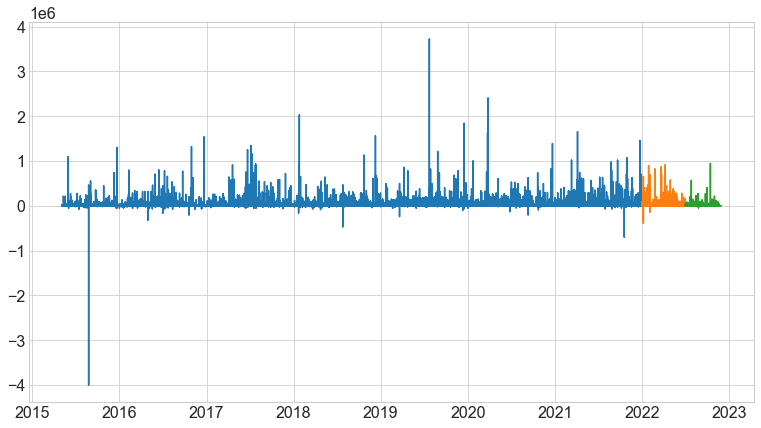

In [114]:
train, test = wr.split_data(df, explore=True)
validate = test.loc[:'2022-06'].copy() 
test = test.loc['2022-07':]

plt.plot(train.index, train.purchase_amount)
plt.plot(validate.index, validate.purchase_amount)
plt.plot(test.index, test.purchase_amount)

In [115]:
train.shape

(346476, 20)

In [116]:
train

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,month_name,day_name,year,quarter,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,,
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0000,720.500000,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,2882.00
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,2.0000,4328.100000,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,8656.20
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0000,6017.760000,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,24071.04
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0000,6085.800000,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,6085.80
2015-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0000,268.550000,PA2,2014-06-17,2014-05-06,May,Wednesday,2015,2,5,19,2,126,268.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,Trinity River Authority,Local Government,Arlington,"Netsync Network Solutions, Inc.",Houston,76018.0,1.0110,397.697626,AAAQ353428,2021-12-30,2021-12-30,December,Thursday,2021,4,12,52,3,364,402.07
2021-12-30,City of Mercedes,Local Government,Mercedes,"Insight Public Sector, Inc.",Tempe,78570,4.0000,165.000000,22-67327,2022-01-31,2021-12-30,December,Thursday,2021,4,12,52,3,364,660.00
2021-12-30,City of Mercedes,Local Government,Mercedes,"Insight Public Sector, Inc.",Tempe,78570,3.0000,165.000000,22-67327,2022-07-31,2021-12-30,December,Thursday,2021,4,12,52,3,364,495.00


In [117]:
train.describe()

,order_quantity,unit_price,year,quarter,month,week,day_of_week,day_of_year,purchase_amount
count,3.464760e+05,3.464760e+05,346476.000000,346476.00000,346476.000000,346476.000000,346476.000000,346476.000000,3.464760e+05
mean,4.504781e+02,1.329856e+03,2018.445924,2.56892,6.653439,27.251097,2.599435,188.063309,3.882340e+03
std,1.601941e+05,1.135885e+04,1.783784,1.05408,3.171734,13.842150,1.593517,96.592741,2.428865e+04
min,-1.273856e+06,0.000000e+00,2015.000000,1.00000,1.000000,1.000000,0.000000,1.000000,-4.000000e+06
25%,1.000000e+00,4.945000e+01,2017.000000,2.00000,4.000000,16.000000,1.000000,109.000000,9.900000e+01
50%,1.000000e+00,2.550000e+02,2019.000000,3.00000,7.000000,28.000000,3.000000,191.000000,4.203300e+02
75%,2.000000e+00,7.650000e+02,2020.000000,3.00000,9.000000,39.000000,4.000000,272.000000,1.713600e+03
max,9.409319e+07,4.000000e+06,2021.000000,4.00000,12.000000,53.000000,6.000000,366.000000,3.723000e+06


In [120]:
train.shape, validate.shape, test.shape

((346476, 20), (17608, 20), (8753, 20))

# #Explore Questions

# Question 10.What are the trends in sales with school districts as a subgroup (seasonality)?

In [121]:
types = train[['purchase_amount','customer_type']]

In [122]:
types.describe()

,purchase_amount
count,3.464760e+05
mean,3.882340e+03
std,2.428865e+04
min,-4.000000e+06
25%,9.900000e+01
50%,4.203300e+02
75%,1.713600e+03
max,3.723000e+06


In [123]:
types.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346476 entries, 2015-05-06 to 2021-12-31
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_amount  346476 non-null  float64
 1   customer_type    346476 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.9+ MB


In [124]:
types.customer_type.value_counts()

K-12                117165
Local Government    109195
State Agency         63597
Higher Ed            55933
Other                  586
Name: customer_type, dtype: int64

### create subgroups

In [125]:
types.customer_type.value_counts()

K-12                117165
Local Government    109195
State Agency         63597
Higher Ed            55933
Other                  586
Name: customer_type, dtype: int64

In [126]:
k_12= types[types["customer_type"]=='K-12']

In [127]:
local_gov = types[types["customer_type"]=='Local Government']

In [128]:
state_agency = types[types["customer_type"]=='State Agency']

In [129]:
higher_ed = types[types["customer_type"]=='Higher Ed']

In [130]:
other = types[(types['customer_type']=='Assistance Org') | (types['customer_type']=="Other")]

In [131]:
subgroups = ['k_12','local_gov','state_agency','higher_ed ']

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

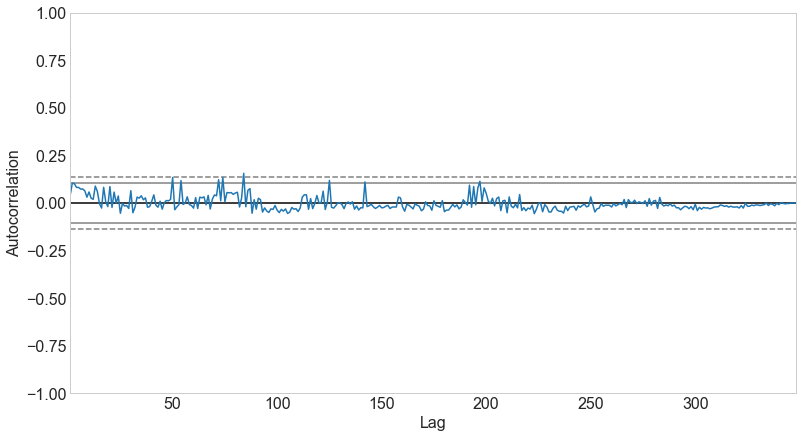

In [132]:
# autocorrelation for k-12
pd.plotting.autocorrelation_plot(k_12.resample('w').mean())



<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

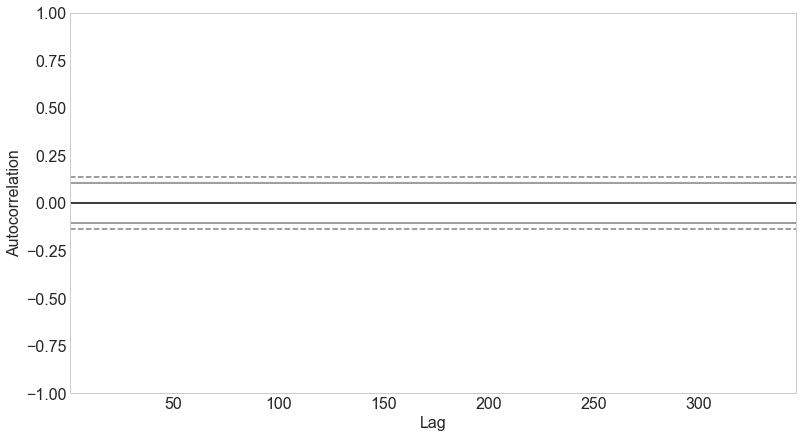

In [133]:
# autocorrolation for higer_Ed
pd.plotting.autocorrelation_plot(higher_ed.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

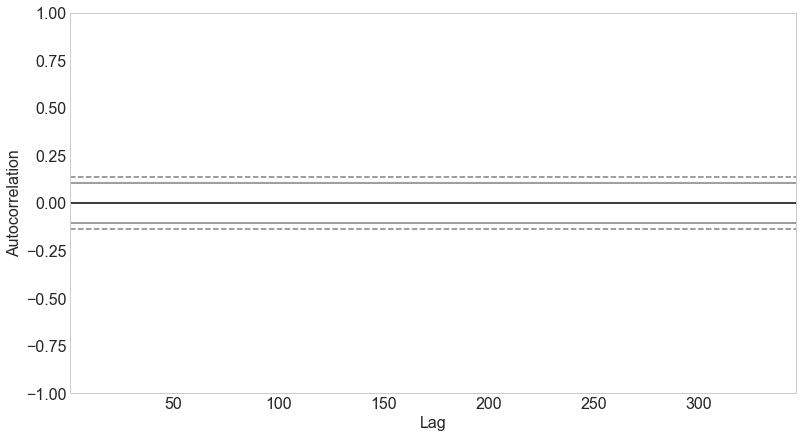

In [136]:
# autorcorrelation for state agency
pd.plotting.autocorrelation_plot(state_agency.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

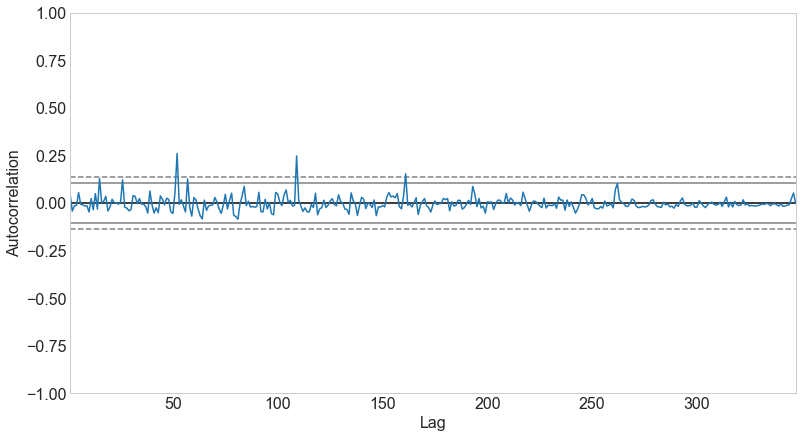

In [137]:
# auto correlation for local_gov
pd.plotting.autocorrelation_plot(local_gov.resample('W').mean())

<AxesSubplot:xlabel='order_date'>

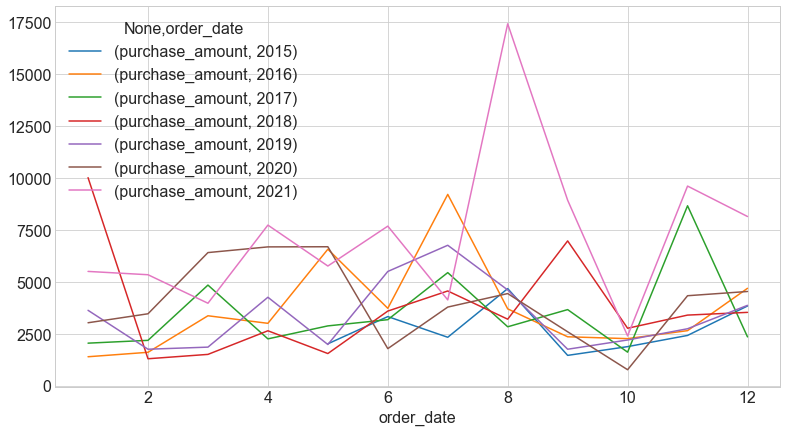

In [138]:
k_12.groupby([k_12.index.year, k_12.index.month]).mean().unstack(0).plot()

<AxesSubplot:xlabel='order_date'>

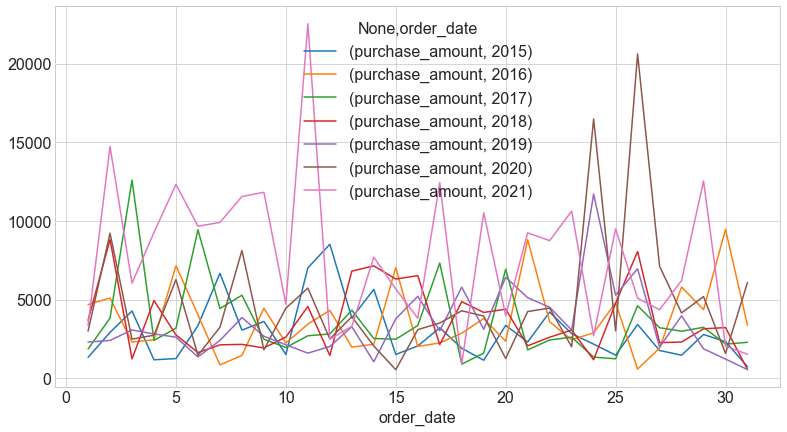

In [139]:
k_12.groupby([k_12.index.year, k_12.index.day]).mean().unstack(0).plot()

<AxesSubplot:xlabel='order_date,order_date'>

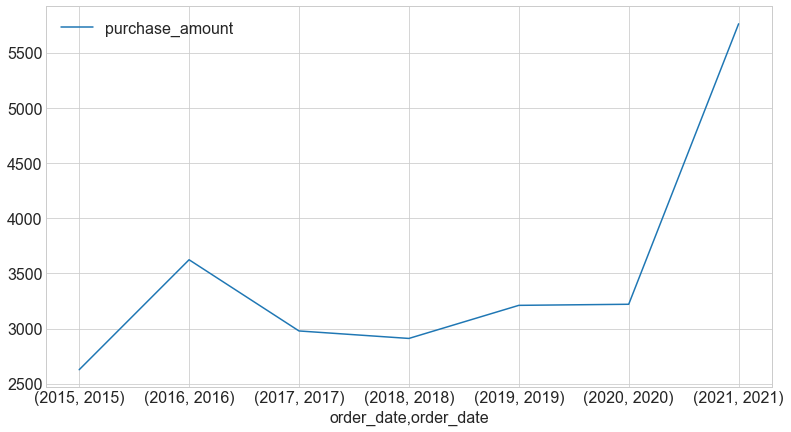

In [140]:
k_12.groupby([k_12.index.year, k_12.index.year]).mean().plot()

In [141]:
y = k_12.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [142]:
result.trend

order_date
2015-05-10   NaN
2015-05-17   NaN
2015-05-24   NaN
2015-05-31   NaN
2015-06-07   NaN
              ..
2021-12-05   NaN
2021-12-12   NaN
2021-12-19   NaN
2021-12-26   NaN
2022-01-02   NaN
Freq: W-SUN, Name: trend, Length: 348, dtype: float64

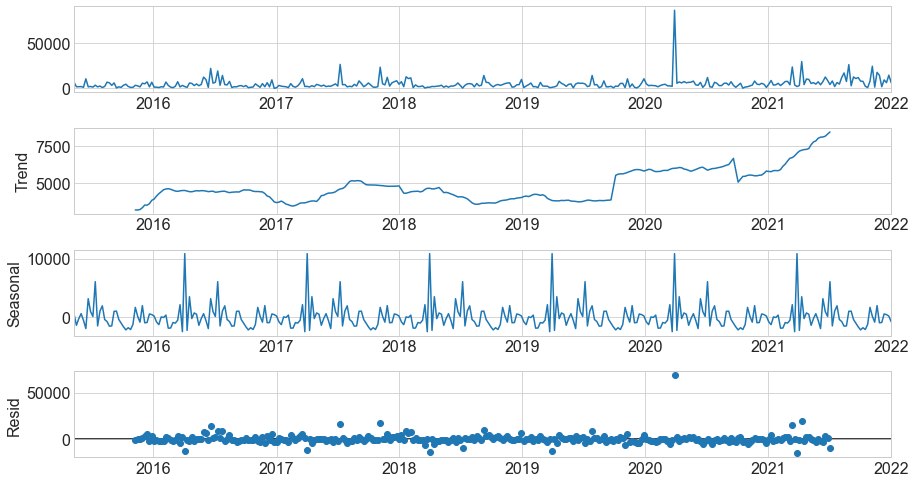

In [143]:
result.plot()
None

In [144]:
def create_customertype_subgroups(train):
    
    types = train[['purchase_amount','customer_type']]
    k_12= types[types["customer_type"]=='K-12']
    local_gov = types[types["customer_type"]=='Local Government']
    state_agency = types[types["customer_type"]=='State Agency']
    higher_ed = types[types["customer_type"]=='Higher Ed']
    other = types[(types['customer_type']=='Assistance Org') | (types['customer_type']=="Other")]
    
    return k_12, local_gov, state_agency, higher_ed, other

In [145]:
k_12

,purchase_amount,customer_type
order_date,,
2015-05-06,2882.00,K-12
2015-05-06,8656.20,K-12
2015-05-06,24071.04,K-12
2015-05-06,6085.80,K-12
2015-05-06,268.55,K-12
...,...,...
2021-12-29,2535.00,K-12
2021-12-29,13845.00,K-12
2021-12-29,14625.00,K-12


There seems to be some seasonality to the k-12 subgroup. Horray!!

In [146]:
def get_timeseries_plus(df):
    print(pd.plotting.autocorrelation_plot(df.resample('W').mean()))
    print (df.groupby([df.index.year, df.index.month]).mean().unstack(0).plot())
    print(df.groupby([df.index.year, df.index.day]).mean().unstack(0).plot())
    y = df.resample('W').mean()

    result = sm.tsa.seasonal_decompose(y)
    print(result.plot())
  

In [147]:
def get_seasonality(df):
    '''
    get seasonality takes a dataframe with date as index and prints out seasonalty results
    '''
    y = df.resample('W').mean()

    result = sm.tsa.seasonal_decompose(y)
    print(result.plot())

Figure(936x504)


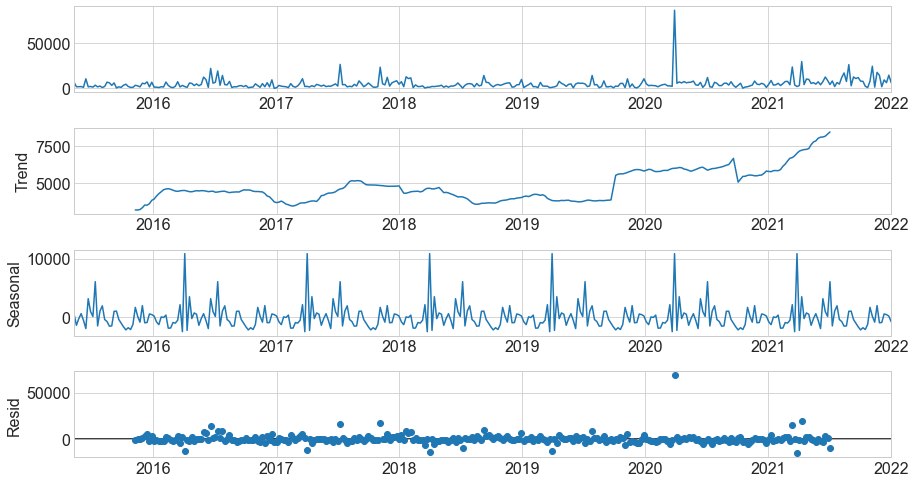

In [148]:
get_seasonality(k_12)

# Question Is there seasonality for higher education subgroup

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


ValueError: This function does not handle missing values

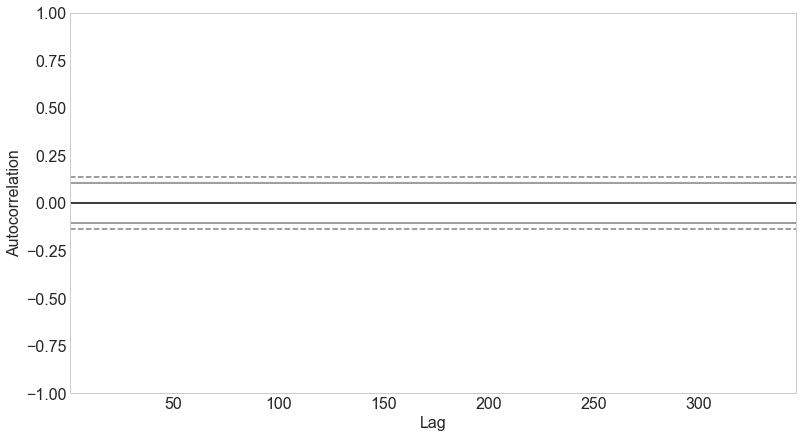

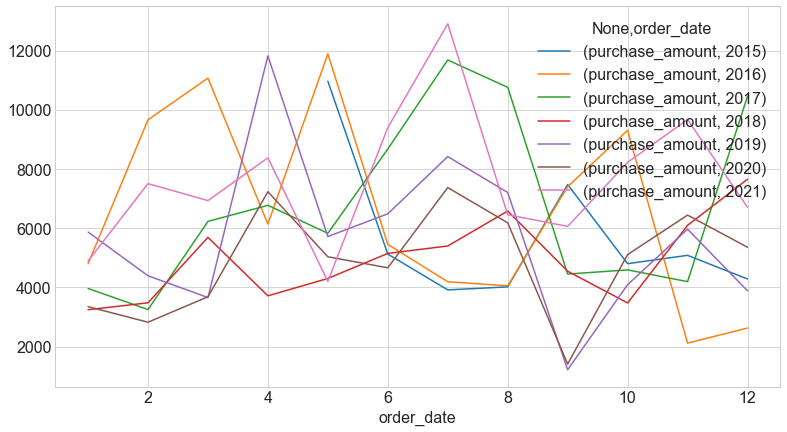

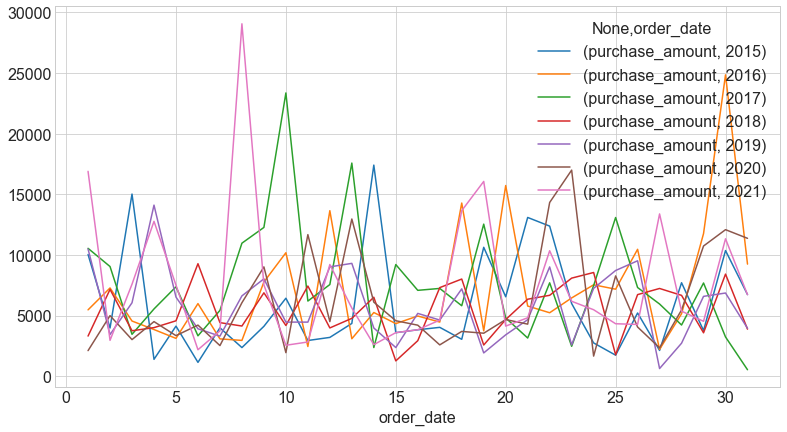

In [154]:
get_timeseries_plus(higher_ed)

In [192]:
higher_ed.index.to_series().diff().dt.days > 1

order_date
2015-05-20    False
2015-05-20    False
2015-05-20    False
2015-05-20    False
2015-05-20    False
              ...  
2021-12-29    False
2021-12-29    False
2021-12-29    False
2021-12-30    False
2021-12-30    False
Name: order_date, Length: 55933, dtype: bool

In [189]:
print(pd.date_range(
  start="2015", end="2017").difference(higher_ed.index))

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=332, freq=None)


In [193]:
higher_ed.loc['2015-05-20']

,purchase_amount,customer_type
order_date,,
2015-05-20,270.00,Higher Ed
2015-05-20,212267.25,Higher Ed
2015-05-20,2250.00,Higher Ed
2015-05-20,2250.00,Higher Ed
2015-05-20,31727.25,Higher Ed
2015-05-20,10786.50,Higher Ed
2015-05-20,7191.00,Higher Ed
2015-05-20,1650.00,Higher Ed
2015-05-20,94.50,Higher Ed


/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1879/1271882252.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  higher_ed['2015-05'].plot()


<AxesSubplot:xlabel='order_date'>

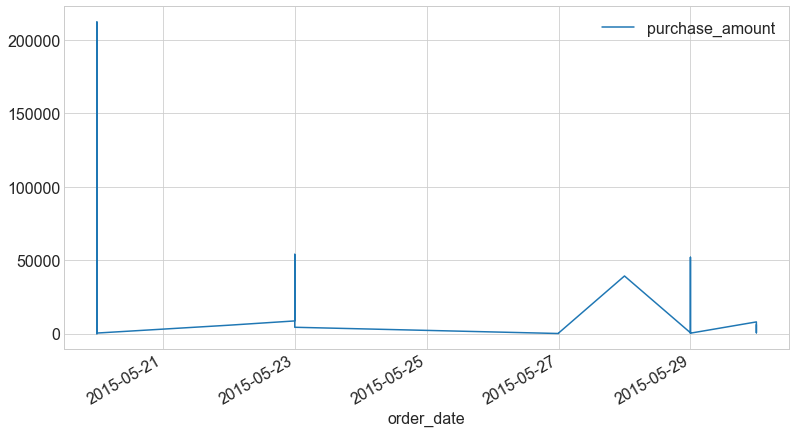

In [201]:
higher_ed['2015-05'].plot()

There seems to be seasonality by higher education but has missing date index values on dates before 2018

# Question Is there seasonlity by local government ?

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Figure(936x504)


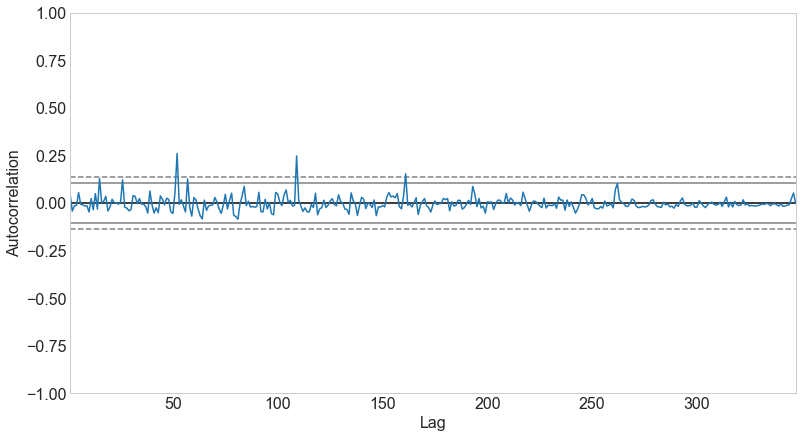

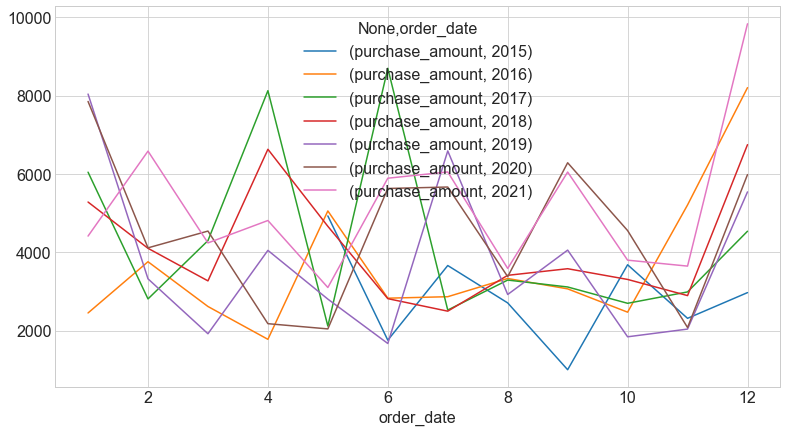

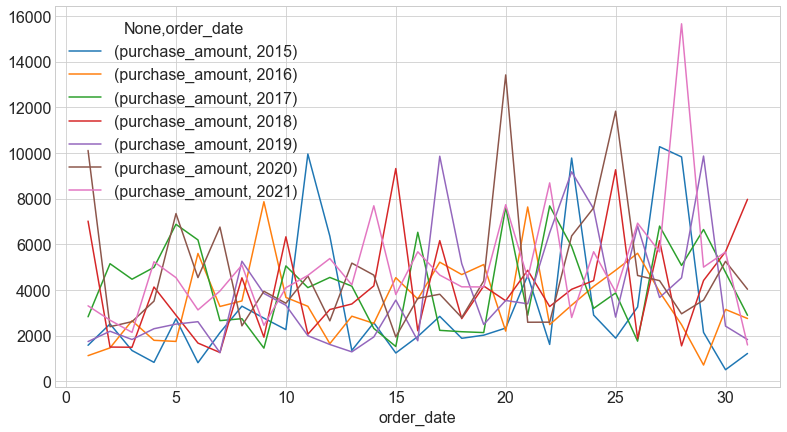

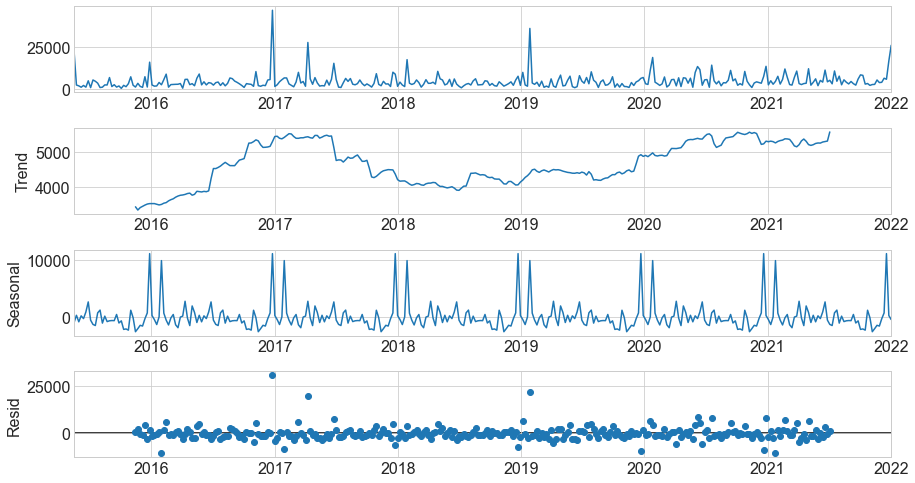

In [155]:
get_timeseries_plus(local_gov)

There seems to be seasonality by local government

# Question Is there seasonality by state agency subgroup?

In [165]:
state_agency

,purchase_amount,customer_type
order_date,,
2015-05-21,2808.26,State Agency
2015-05-31,3511.20,State Agency
2015-05-31,2340.80,State Agency
2015-05-31,570.00,State Agency
2015-05-31,29632.40,State Agency
...,...,...
2021-12-29,854.85,State Agency
2021-12-29,1978.08,State Agency
2021-12-30,5402.81,State Agency


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


ValueError: This function does not handle missing values

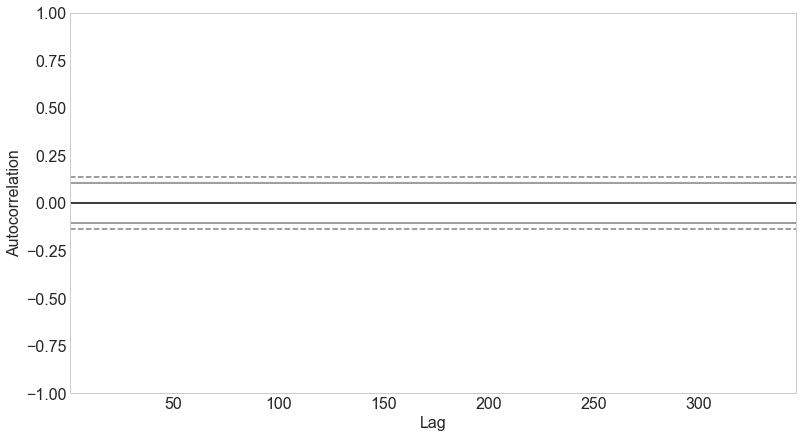

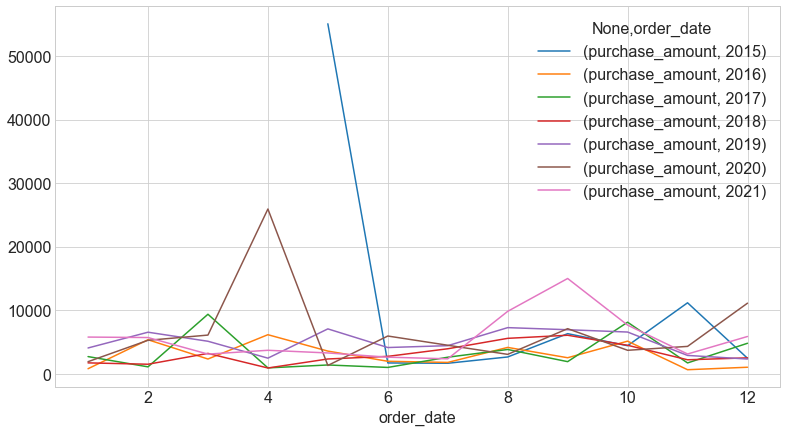

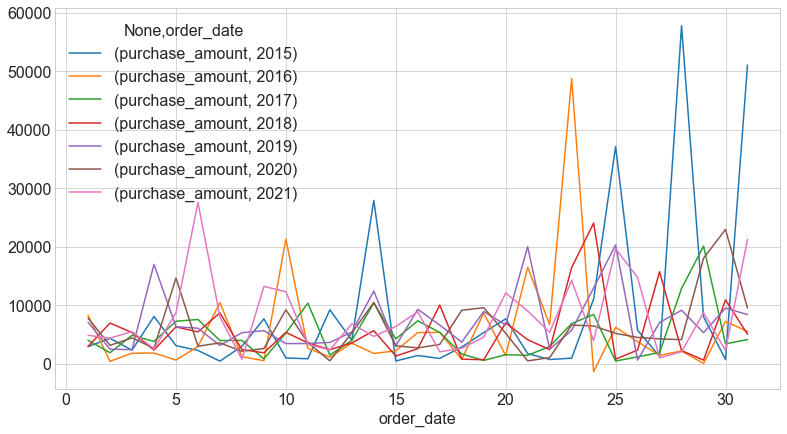

In [156]:
get_timeseries_plus(state_agency)

In [175]:
state_agency.index.to_series().diff().dt.days > 1

order_date
2015-05-21    False
2015-05-31     True
2015-05-31    False
2015-05-31    False
2015-05-31    False
              ...  
2021-12-29    False
2021-12-29    False
2021-12-30    False
2021-12-30    False
2021-12-30    False
Name: order_date, Length: 63597, dtype: bool

In [177]:
print(pd.date_range(
  start="2015", end="2017").difference(state_agency.index))

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', length=505, freq=None)


In [183]:
state_agency.loc['2015-05-21']

purchase_amount         2808.26
customer_type      State Agency
Name: 2015-05-21 00:00:00, dtype: object

/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1879/852364597.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  state_agency['2016-12'].plot()


<AxesSubplot:xlabel='order_date'>

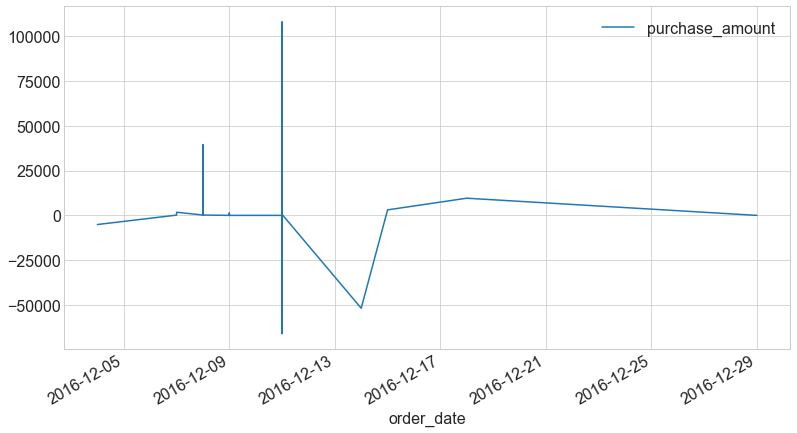

In [188]:
state_agency['2016-12'].plot()

There seems to be seasonality by state agency!! yay! but there is missing values from 2015. Missing date index values from before 2018

# Question Who are the top customer by city and zipcode?

### zip code group

In [157]:
zipcode_group = train.groupby('customer_zip').sum()

In [158]:
zipcode_group.sort_values(by='purchase_amount', ascending=False).head(10)

,order_quantity,unit_price,year,quarter,month,week,day_of_week,day_of_year,purchase_amount
customer_zip,,,,,,,,,
78711.0,1.071577e+08,4.821223e+07,58874843,76823,204981,834475,85974,5769276,97849329.11
78283.0,5.087749e+06,1.660932e+07,13371819,17046,43980,180659,17329,1247556,68850321.44
78701,3.463723e+06,2.885856e+07,47039023,61161,156188,646553,54637,4451689,63772397.56
77843.0,6.595172e+06,1.106534e+07,14578610,20046,56178,237561,23617,1640386,38627487.64
77002.0,3.659008e+05,1.455962e+07,23695262,30865,81215,334148,26302,2287122,38283780.08
78284.0,9.610105e+05,8.319266e+06,13022550,15794,39701,163035,15687,1118689,37911998.58
78744,1.710320e+06,1.503203e+07,23064265,29652,77032,317343,34662,2188054,29712686.69
75202.0,6.956514e+05,6.125410e+06,6811584,8548,21658,87706,7926,602387,28103701.55
75235,8.484792e+05,5.331974e+06,4131210,4791,11547,46531,4938,318274,24197977.09


In [159]:
zipcode_group.purchase_amount.sort_values(ascending=False).head(10)

customer_zip
78711.0    97849329.11
78283.0    68850321.44
78701      63772397.56
77843.0    38627487.64
77002.0    38283780.08
78284.0    37911998.58
78744      29712686.69
75202.0    28103701.55
75235      24197977.09
78713      19903894.83
Name: purchase_amount, dtype: float64

Top 10 zip codes with the most amount of sale
```python
customer_zip
78711.0    70827814.74
78701.0    51277782.36
78283.0    41166193.52
78284.0    28639824.22
77002.0    26623197.04
77843.0    25716583.60
75202.0    20324930.91
78744.0    18183676.92
78773.0    17422748.79
75201      17381374.18
```

In [160]:
train.columns

Index(['customer_name', 'customer_type', 'customer_city', 'reseller_name',
       'reseller_city', 'customer_zip', 'order_quantity', 'unit_price',
       'po_number', 'shipped_date', 'order_date_copy', 'month_name',
       'day_name', 'year', 'quarter', 'month', 'week', 'day_of_week',
       'day_of_year', 'purchase_amount'],
      dtype='object')

### city group

In [161]:
city_group = train.groupby('customer_city').sum()

In [162]:
city_group.purchase_amount.sort_values( ascending=False).head(10)

customer_city
Austin             2.992851e+08
San Antonio        1.579988e+08
Dallas             9.202128e+07
Houston            9.107277e+07
Fort Worth         4.467989e+07
College Station    4.008807e+07
Corpus Christi     2.793827e+07
The Woodlands      1.878000e+07
Laredo             1.591741e+07
Brownsville        1.579727e+07
Name: purchase_amount, dtype: float64

Top city
```python

customer_city
Austin             2.143281e+08
San Antonio        1.088871e+08
Dallas             7.012604e+07
Houston            6.047798e+07
Fort Worth         2.890292e+07
College Station    2.620113e+07
Corpus Christi     2.042766e+07
Brownsville        1.272968e+07
Katy               1.240277e+07
Lewisville         1.202530e+07
```